In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224,224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/test', target_size = (224,224),
                                            batch_size = 4,
                                            class_mode = 'categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [43]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32, 3, activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(64, 3, activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [44]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [45]:
r = model.fit_generator(training_set, steps_per_epoch = len(training_set)/4, epochs = 50, 
          validation_data = test_set, validation_steps = len(test_set)/4 )

  ...
    to  
  ['...']
Train for 4.0 steps, validate for 3.75 steps
Epoch 1/50
4/4 [==============================] - 1s 289ms/step - loss: 2.8602 - accuracy: 0.3750 - val_loss: 1.0665 - val_accuracy: 0.3750
Epoch 2/50
4/4 [==============================] - 0s 110ms/step - loss: 1.5030 - accuracy: 0.2500 - val_loss: 1.4840 - val_accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 105ms/step - loss: 1.2567 - accuracy: 0.1875 - val_loss: 1.1604 - val_accuracy: 0.6875
Epoch 4/50
4/4 [==============================] - 0s 109ms/step - loss: 1.0851 - accuracy: 0.4375 - val_loss: 1.0856 - val_accuracy: 0.6250
Epoch 5/50
4/4 [==============================] - 0s 119ms/step - loss: 1.1386 - accuracy: 0.1250 - val_loss: 1.1500 - val_accuracy: 0.6250
Epoch 6/50
4/4 [==============================] - 0s 100ms/step - loss: 1.1005 - accuracy: 0.2500 - val_loss: 1.1921 - val_accuracy: 0.3750
Epoch 7/50
4/4 [==============================] - 0s 104ms/step - loss: 1.1314 - accur

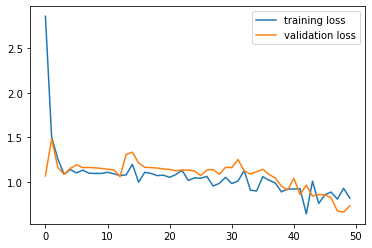

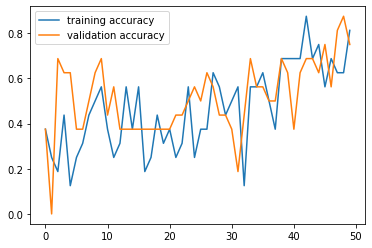

In [46]:
plt.plot(r.history['loss'],label = 'training loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label = 'training accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

In [47]:
y_pred = model.predict(test_set)

In [48]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [49]:
y_pred

array([1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0], dtype=int64)